<b><p style="text-align:center; font-family:verdana; font-size:220%;"> Initiation au développement en Python</p></b>
<div style="text-align: center">
    <img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/Silly-Walk-monty-python.png" alt="" width="480">
</div>
<b><p style="text-align:center; font-family:verdana; font-size:220%;">TP8 Complémentaire <BR><i>"And Now for Something Completely Different"</i> </p></b>

_**Indiquez ici votre nom et prénom :**_

Cellule des importations à effectuer une fois  avant d'exécuter les cellules de code du TP :

In [8]:
## EXECUTE ME FIRST! ##
from random import *
from dutgraphics import *
import dutgraphics

# Plan
* [1. Images](#1.-Images)
	* [1.1 La classe Picture](#1.1-La-classe-Picture)
	* [1.2 Chronomètre](#1.2-Chronomètre)
* [2. Puissance 4](#2.-Puissance-4)
* [3. Casse-briques](#3.-Casse-briques)
	* [3.1 Version automatique](#3.1-Version-automatique)
	* [3.2 Version clavier](#3.2-Version-clavier)
* [4. Le Pendu](#4.-Le-Pendu)
	* [4.1 Règle du jeu](#4.1-Règle-du-jeu)
	* [4.2 Version texte](#4.2-Version-texte)
	* [4.3 Version graphique](#4.3-Version-graphique)

L'ordre des exercices n'est pas imposé. Vous veillerez à coder la solution dans une fonction même si ce n'ets pas indiqué dans l'énoncé. N'hésitez pas à découper chaque problème et à créer des fonctions qui permettent de le simplifier.

# 1. Images

## 1.1 La classe Picture

Le constructeur de `Picture` demande trois arguments identifiés : `start` pour la position de l'image et `size` pour sa dimension, sous la forme de deux couples `(x, y)` et `(largeur, hauteur)`, et `href` pour le nom de fichier complet (avec son chemin) de l'image à afficher :
    
```python
img = Picture(dutgraphics._url+'house.png', (200, 10) , (200, 150))
```

>La variable `dutgraphics._url` contient l'adresse des images utilisées dans les exercices.

Si `p` est une instance de `Picture`, elle dispose des méthodes suivantes :

`p.draw(cv)`
> Dessine l'image `p` sur le canevas `cv`  passé en argument. C'est équivalent à `cv.draw(p)`

`p.undraw()`
> Supprime l'image `p`. 

`p.moveToTop()`
> Place l'image `p` au premier plan.

`p.moveToBottom()`
> Place l'image `p` au dernier plan.

Voici un exemple d'utilisation d'instances de la classe `Picture` pour recréer une version du dessin de la maison utilisé auparavant.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/autremaison.png" alt="autremaison" width="300"></div>

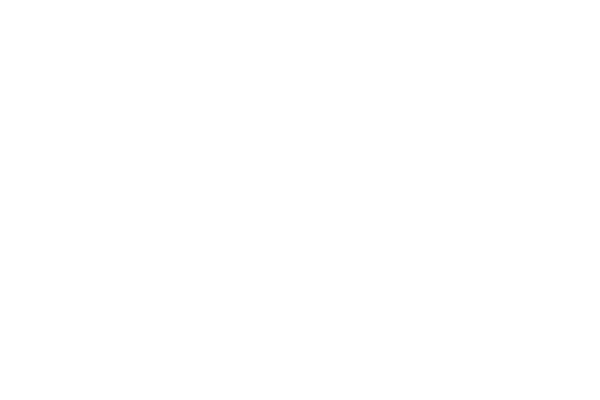

In [2]:
def exemplePicture() -> None:
    # adresse commune de toutes les images
    dir = dutgraphics._url
    canvas = Canvas(size=(600, 400))
    canvas.draw(Picture(dir+'sky.png', (0, 0), (600, 267)))
    canvas.draw(Picture(dir+'ground.png', (0, 267), (600, 133)))
    canvas.draw(Picture(dir+'house.png', (50, 150), (80, 200)))
    canvas.draw(Picture(dir+'house.png', (0, 180), (100, 200)))
    canvas.draw(Picture(dir+'house.png', (120, 180), (200, 200)))
    canvas.draw(Picture(dir+'cloud.png', (0, 0), (120, 200)))
    canvas.draw(Picture(dir+'cloud.png', (100, 10), (200, 200)))
    canvas.draw(Picture(dir+'tree.png', (430, 120), (160, 200)))
    canvas.draw(Picture(dir+'tree.png', (400, 130), (180, 200)))
    canvas.draw(Picture(dir+'tree.png', (300, 150), (200, 200)))
    canvas.display()
    return None

exemplePicture()

## 1.2 Chronomètre

Vous devez reproduire l'affichage d'un chronomètre de 1 à 59 secondes, comme dans la figure ci-dessous :

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/chrono.gif" alt="" width="150"></div>

Pour réaliser cet affichage vous disposez (dans le répertoire indiqué) des 10 images des chiffres nommées `0.png` `1.png` `2.png` ... `9.png`

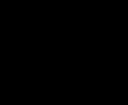

In [14]:
def chrono(nbreRepetitions: int) -> None:
    # répertoire commun de toutes les images
    dir = dutgraphics._url
    # taille des images de chiffre
    w = 64
    h = 105

    cv=Canvas((128,105))
    cv.drawFrame(black)
    L=['0.png','1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
    
    for i in range(6):
        dizaine = Picture(dutgraphics._url+L[i], (0, 0) , (w, h))
        cv.draw(dizaine)
        for j in range(10):
            unite = Picture(dutgraphics._url+L[j], (64, 0) , (w, h))
            cv.draw(unite)
            cv.displayPause(1)
        cv.undraw(dizaine)  
        cv.undraw(unite)
    
    
    return None

chrono(nbreRepetitions = 1)


[Retour au plan](#Plan)

# 2. Puissance 4

Le but de l’exercice est de créer un programme permettant à un utilisateur de jouer au jeu Puissance
4.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/puissance4.png" alt="Image absente" width="" ></div>

Rappel du jeu (source article Puissance 4 de Wikipédia en français) : le but est d’aligner 4 pions
sur une grille comptant 6 rangées et 7 colonnes. Chaque joueur dispose de 21 pions d’une couleur (en
général jaune ou rouge). Tour à tour les deux joueurs placent un pion dans la colonne de leur choix,
le pion coulisse alors jusqu’à la position la plus basse possible dans ladite colonne suite à quoi c’est à
l’adversaire de jouer. Le vainqueur est le joueur qui réalise le premier un alignement (horizontal, vertical
ou diagonal) d’au moins quatre pions de sa couleur. Si alors que toutes les cases de la grille de jeu sont
remplies aucun des deux joueurs n’a réalisé un tel alignement, la partie est déclarée nulle.

Le choix de la colonne où ajouter un pion se fera au clavier. Prévoyez une touche pour arrêter le jeu. Vous pouvez prévoir aussi que la taille du plateau soit configurable (paramètres au lancement du jeu).

La partie la plus longue à coder est la vérification d'un alignement : gardez-la pour la fin.

In [19]:
def initialisationPlateau(nbLignes : int, nbColonnes : int, taille : int) -> Canvas : #taille donne le rayon d'une case du plateau
    plateau = Canvas((nbColonnes*(taille*2.125),nbLignes*(taille*2.125)))
    plateau.drawFrame(blue)
    ecart=taille*1.1
    ponderation=taille*2.1
    for i in range(nbLignes):
        for j in range(nbColonnes):
            cercleVide=Circle((ecart+ponderation*j,ecart+ponderation*i),taille)
            cercleVide.setFill(white)
            cercleVide.draw(plateau)
    
    return plateau

def creationListePosition(nbLignes : int, nbColonnes : int) -> list :
    listePos=[]
    for i in range(nbColonnes):
        listeColN=[]
        for j in range(nbLignes):
            listeColN.append([False,False,False])
        listePos.append(listeColN)
    return(listePos)




def tourdejeu(listePos : list, couleur : str, taille : int, plateau : Canvas) -> list :
    print(f"C'est au joueur {couleur} de placer son pion.")
    validation=0
    numCol=0
    while validation != 5:
        listeLigne=listPos[numcol]
        positionsCol=listeLigne[0]
        iterateur=0
        while not positionsCol[iterateur]:
            iterateur+=1
        affichageCercleJ(taille, numCol, iterateur, couleur, plateau)
            
    

def affichageCercleJ(taille : int, numCol : int, iterateur : int, couleur : str, plateau : Canvas) -> Circle:
        ecart=taille*1.1
        ponderation=taille*2.1
        caseRemplie=Circle((ecart+ponderation*numCol, ecart+ponderation*iterateur),taille)
        caseRemplie.setColor(couleur)
        caseRemplie.draw(plateau)
        plateau.displayPause(0.5)
    
    
    
    
cv = initialisationPlateau(6, 7, 20)
listePos=creationListePosition(6, 7)


[[[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]], [[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]], [[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]], [[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]], [[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]], [[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]], [[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]]]


[Retour au plan](#Plan)

# 3. Casse-briques

## 3.1 Version automatique

L'exercice consiste à programmer une "balle" qui va rebondir sur les bords d'un canevas. La direction de chaque rebond sera aléatoire (mais en assurant que la balle reste dans le canevas). Dans le canevas seront dessinés des carrés qui disparaîtront lorsque la balle les traversera. Le programme s'arrête après un nombre défini de rebonds ou lorsque tous les carrés ont disparu.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/casseBriques.gif" alt="image absente" width="200"></div>

Pour la détection de collision on suppose que le cercle représentant la balle est plus petit que les carrés. Les classes `Circle` et `Rectangle` disposent des méthodes `getP1()` et `getP2()` retournant une instance de `Point` représentant respectivement leur coin supérieur gauche et leur coin inférieur droit. La classe `Point` dispose des accesseurs `getX()` et `getY()`.

In [9]:
# Tapez votre code ici

## 3.2 Version clavier

Pour ajouter un peu d'interactivité au casse-briques, la direction et la distance parcourue par la balle seront saisies par l'utilisateur au clavier.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/casseBriques.png" alt="image absente" width="400"></div>

Les carrés pourront avoir des points, la distance et le nombre de coups seront comptabilisés aussi de manière à afficher un bilan en fin de partie. 

    Nombre de points : 15
    Nombre de coups : 8
    Distance totale : 1200
    Merci d'avoir joué !

In [ ]:
# Tapez votre code ici

[Retour au plan](#Plan)

# 4. Le Pendu

## 4.1 Règle du jeu

Il s'agit pour l'utilisateur de deviner un mot tiré au hasard en proposant des lettres un nombre maximum de fois (10 essais en général). N'oubliez pas de prévoir un caractère hors alphabet pour quitter le jeu.

Vous pouvez réaliser ce jeu en mode texte ou en mode graphique. Dans la version graphique le nombre d'essais sans succès est représenté par le dessin progressif d'un pendu : quand le dessin est terminé, la partie est perdue. 

Pour tirer un mot au hasard de 4 à 9 lettres, téléchargez et enregistrez dans votre répertoire cette [liste de mots](https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/mots_pendu.txt), et utilisez la fonction suivante fournie :

In [ ]:
def getMotMystere(nbLettres: int) -> str:
    """
    Cette fonction retourne un mot au hasard d'une longueur nbLettres entre 4 et 9 
    dans un fichier texte fourni.
    Les caractères utilisés sont ABCDEFGHIJKLMNOPQRSTUVWXYZ
    """
    # lire le fichier dans un string
    fichier = open("mots_pendu.txt",'r')
    liste = fichier.read()
    fichier.close()
    # transformer le string en liste
    liste = liste.split('\n')
    # conserver les mots avec le nombre de lettres voulu
    tmp = []
    for m in liste:
        if len(m) == nbLettres:
            tmp.append(m)
    # tirer au hasard et retourner
    return choice(tmp)

## 4.2 Version texte

Voici la trace d'une exécution du jeu (le caractère `*` sert à quitter) :

    Combien de lettres (entre 4 et 9) ? 6
    ......
    Lettres possibles : *ABCDEFGHIJKLMNOPQRSTUVWXYZ
    Lettre ? (il reste 10 essais) A
    Lettres possibles : *BCDEFGHIJKLMNOPQRSTUVWXYZ
    ......
    Lettre ? (il reste 9 essais) O
    Lettres possibles : *BCDEFGHIJKLMNPQRSTUVWXYZ
    ....O.
    Lettre ? (il reste 9 essais) P
    Lettres possibles : *BCDEFGHIJKLMNQRSTUVWXYZ
    P...O.
    Lettre ? (il reste 9 essais) E
    Lettres possibles : *BCDFGHIJKLMNQRSTUVWXYZ
    P...O.
    Lettre ? (il reste 8 essais) H
    Lettres possibles : *BCDFGIJKLMNQRSTUVWXYZ
    P..HO.
    Lettre ? (il reste 8 essais) T
    Lettres possibles : *BCDFGIJKLMNQRSUVWXYZ
    P.THO.
    Lettre ? (il reste 8 essais) B
    Lettres possibles : *CDFGIJKLMNQRSUVWXYZ
    P.THO.
    Lettre ? (il reste 7 essais) Y
    Lettres possibles : *CDFGIJKLMNQRSUVWXZ
    PYTHO.
    Lettre ? (il reste 7 essais) 555
    Une seule lettre !
    Lettre ? (il reste 7 essais) 5
    Lettre impossible ou déjà jouée...
    Lettre ? (il reste 7 essais) N
    Lettres possibles : *CDFGIJKLMQRSUVWXZ
    PYTHON
    Bravo c'est gagné !


In [ ]:
# Tapez votre code ici

## 4.3 Version graphique

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/jeupendu.gif" alt="image absente" width="400"></div>

Pour réaliser cette version graphique du jeu vous allez utiliser la classe `Picture` et des images accessibles en ligne dans le répertoire `dutgraphics._url`.

> Vous pouvez essayer de conserver la version texte dans cette nouvelle version, et passer un paramètre booléen qui permet de passer d'une version à l'autre.

Vous avez besoin de dessiner différentes parties du jeu.

- Le fond : l'image de fond se nomme `pendu.png`. Elle se place en `(0, 0)`  et sa dimension est `(800, 450)`.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/pendu.png" alt="image absente" width="400" ></div>

- Le pendu : les 11 images successives du pendu ont pour nom `"pendu1.png" "pendu2.png" "pendu3.png"` etc. Elles se placent en `(0, 0)`  et leur dimension est `(234, 401)`.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/showGallows.png" alt="image absente" width=""></div>

- Les lettres : chaque lettre correspond à un fichier sous la forme `"ImageA.png" "ImageB.png" "ImageC.png"` etc. Les lettres au début du jeu apparaissent dans une zone de l'écran (la place n'est pas imposée). Quand une lettre est proposée, elle doit disparaître de la liste initiale, et apparaître le cas échéant à sa place dans le mot à deviner (sur le trait correspondant). Leur dimension est `(120, 120)`.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/letters.png" alt="image absente" width="" ></div>

- Les traits représentant les lettres du mot à deviner : leur nombre dépend du nombre de lettres choisi. Deux images sont disponibles `"trait1.png" "trait2.png"` de dimension `(50, 7)`. La place n'est pas imposée (mais évidemmet les lettres du mot devinées se placent au dessus).

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/traits.png" alt="image absente" width="" ></div>

- L'affichage "gagné" : l'image du mot "GAGNÉ !" correspond au fichier `"win.png"` de dimension `(400, 284)`. Vous la placez où vous voulez.

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/win.png" alt="image absente" width="300" ></div>

- L'affichage "perdu" : pour indiquer que le joueur a perdu la lettre "R" va se placer au-dessus de la lettre "N" du mot "PENDU".

<div align=center><img src="https://iut-info.univ-reims.fr/users/romaniuk/restricted/S1AlgoProg/ressources/perdu.png" alt="image absente" width="300" ></div>

In [ ]:
# Tapez votre code ici


pendu(graphics=True)

[Retour au plan](#Plan)